In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/subhashdixit/NLP/main/Restaurant_Reviews/Restaurant_Reviews.tsv',delimiter = "\t")

In [3]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


## **Text Cleaning**
* Remove Punctuations, Numbers: Punctuations, Numbers don’t help much in processing the given text, if included, they will just increase the size of a bag of words that we will create as the last step and decrease the efficiency of an algorithm
* Stemming: Take roots of the word 
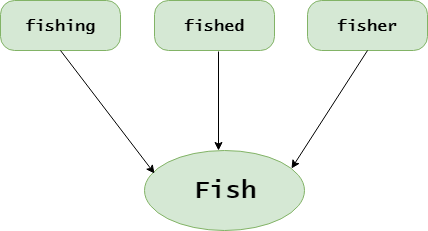
* Convert each word into its lower case: For example, it is useless to have some words in different cases (eg ‘good’ and ‘GOOD’)

In [4]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

**Stopwords**
* Stopwords are the words in any language which does not add much meaning to a sentence
* They can safely be ignored without sacrificing the meaning of the sentence. For some search engines, these are some of the most common, short function words, such as the, is, at, which, and on
* stop words can cause problems when searching for phrases that include them, particularly in names such as “The Who” or “Take That”

In [5]:
"""library to clean data"""
import re
"""Natural Language Tool Kit"""
import nltk
nltk.download('stopwords')
"""to remove stopword"""
from nltk.corpus import stopwords
"""for Stemming propose"""
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# Initialize empty array
# to append clean text
corpus = []

for i in range(0, 1000):
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
   
    # # convert all cases to lower cases
    review = review.lower()
     
    # # split to array(default delimiter is " ")
    review = review.split()
     
    """creating PorterStemmer object to take main stem of each word"""
    ps = PorterStemmer()
     
    """loop for stemming each word in string array at ith row"""   
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))]
                 
    """rejoin all string array elements to create back into a string"""
    review = ' '.join(review) 
     
    """append each string to create array of clean text"""
    corpus.append(review)
print(corpus)

['wow love place', 'crust good', 'tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place worth time let alon vega', 'like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could happier', 'seem like go

In [7]:
"""Old and New Text"""
pd.concat([df,pd.DataFrame(corpus, columns=['New'])], axis = 1)

,Review,Liked,New
0,Wow... Loved this place.,1,wow love place
1,Crust is not good.,0,crust good
2,Not tasty and the texture was just nasty.,0,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor textur lack
996,Appetite instantly gone.,0,appetit instantli gone
997,Overall I was not impressed and would not go b...,0,overal impress would go back
998,"The whole experience was underwhelming, and I ...",0,whole experi underwhelm think go ninja sushi n...


## **Tokenization**
* Involves splitting sentences and words from the body of the text
* Corpus – Body of text, singular. Corpora is the plural of this.
* Lexicon – Words and their meanings.
* Token – Each “entity” that is a part of whatever was split up based on rules. * For examples, each word is a token when a sentence is “tokenized” into words. Each sentence can also be a token, if you tokenized the sentences out of a paragraph.
So basically tokenizing involves splitting sentences and words from the body of the text.

In [8]:
# libraries
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

In [9]:
# print(sent_tokenize(corpus))
# print(word_tokenize(corpus))
# word_tokenize(corpus[0])
# for i in corpus:
#   print(i)
# word_tokenize(str(corpus))
# X = df.iloc[:, :1]
# y = df.iloc[:, -1:]

## **Bag of words**
* Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 5)
 
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()
 
# y contains answers if review
# is positive or negative
y = df.iloc[:, 1].values

## **Train Test Split**

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

## **Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 501, criterion = 'entropy')
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=501)

In [13]:
y_pred = model.predict(X_test) 

## **Accuracy**

* TRUE POSITIVE : measures the proportion of actual positives that are correctly identified. 
* TRUE NEGATIVE : measures the proportion of actual positives that are not correctly identified. 
* FALSE POSITIVE : measures the proportion of actual negatives that are correctly identified. 
* FALSE NEGATIVE : measures the proportion of actual negatives that are not correctly identified.
* Note: True or False refers to the assigned classification being Correct or Incorrect, while Positive or Negative refers to assignment to the Positive or the Negative Category 

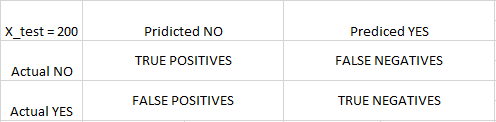

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[119,  15],
       [ 69,  47]])

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.89      0.74       134
           1       0.76      0.41      0.53       116

    accuracy                           0.66       250
   macro avg       0.70      0.65      0.63       250
weighted avg       0.69      0.66      0.64       250



## **Sample Prediction**

In [17]:
def Predict_Sentiment(sample_review):
    word = []
    sample_review = re.sub('[^a-zA-Z]', ' ', sample_review)
    sample_review = sample_review.lower()
    sample_review = sample_review.split()
    """creating PorterStemmer object to take main stem of each word"""
    ps = PorterStemmer()
    """loop for stemming each word in string array at ith row"""   
    sample_review = [ps.stem(word) for word in sample_review if not word in set(stopwords.words('english'))]
    """rejoin all string array elements to create back into a string"""
    sample_review = ' '.join(sample_review) 
    """append each string to create array of clean text"""
    word.append(sample_review)
    temp = cv.transform(word).toarray()
    return model.predict(temp)[0]
    

In [18]:
if (Predict_Sentiment("Food was very good an dit was pretty as well")):
  print("Good Review")
else:
  print("Bad Review")

Good Review


## **Save Model**

In [19]:
import pickle
pickle.dump(model, open("model_random.pkl", "wb"))